## Loading geometries, cubes and horizons

In [1]:
# Necessary imports
%load_ext autoreload
%autoreload 2

import sys
import warnings

import numpy as np

sys.path.append('..')
from seismiqb.batchflow import Pipeline, FilesIndex
from seismiqb import SeismicCropBatch, SeismicGeometry, SeismicCubeset, Horizon
from seismiqb import plot_image, HorizonMetrics

warnings.filterwarnings("ignore")

In [6]:
geometry = SeismicGeometry('/data/seismic/CUBE_2/M_cube.hdf5')
horizon = Horizon('/data/seismic/CUBE_2/RAW/t0_BV8_anon', geometry=geometry)

# geometry = SeismicGeometry('/data/seismic/CUBE_12/A_cube.hdf5')
# horizon = Horizon('/data/seismic/CUBE_12/FULL_CONVERTED/V-3', geometry=geometry)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def make_colormap(seq):
    """Return a LinearSegmentedColormap
    seq: a sequence of floats and RGB-tuples. The floats should be increasing
    and in the interval (0,1).
    """
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    print(cdict)
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)


c = mcolors.ColorConverter().to_rgb
cmp = make_colormap(
    [c('red'), c('red'), 0.33/2, c('red'), c('orange'), 0.33, c('orange'), c('yellow'), 0.66, c('yellow'), c('green')])

{'red': [[0.0, None, 1.0], [0.165, 1.0, 1.0], [0.33, 1.0, 1.0], [0.66, 1.0, 1.0], [1.0, 0.0, None]], 'green': [[0.0, None, 0.0], [0.165, 0.0, 0.0], [0.33, 0.6470588235294118, 0.6470588235294118], [0.66, 1.0, 1.0], [1.0, 0.5019607843137255, None]], 'blue': [[0.0, None, 0.0], [0.165, 0.0, 0.0], [0.33, 0.0, 0.0], [0.66, 0.0, 0.0], [1.0, 0.0, None]]}


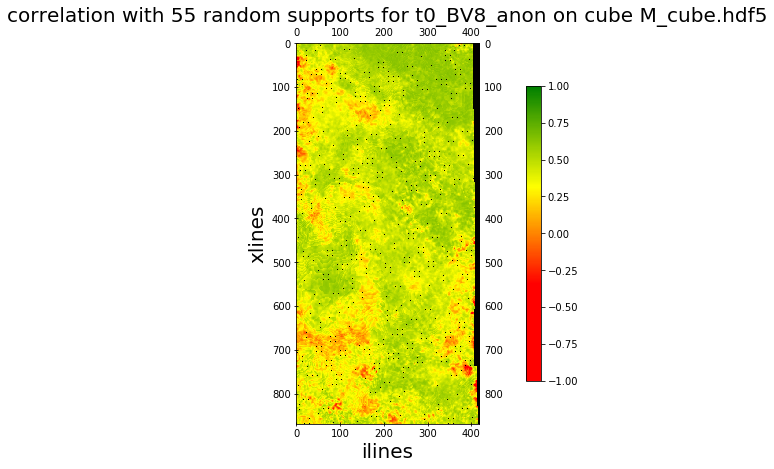

In [24]:
hm = HorizonMetrics(horizon)

metric = hm.evaluate('support_corrs', supports=55, plot=True, bad_color='black')

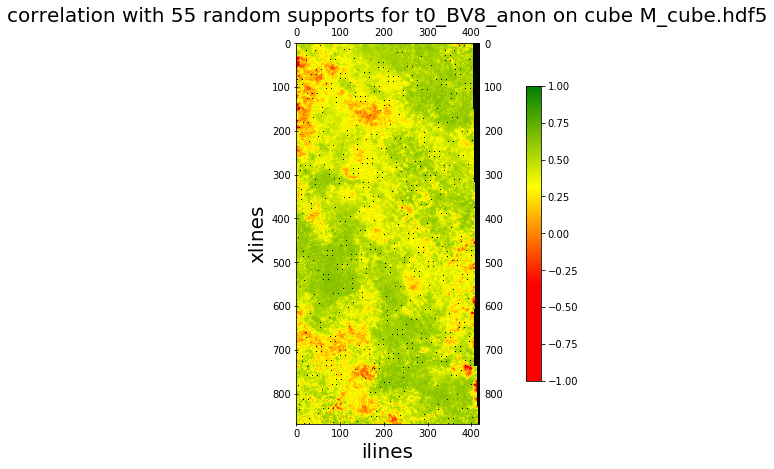

In [25]:
hm = HorizonMetrics(horizon)

metric = hm.evaluate('support_corrs', supports=55, plot=True, bad_color='black')

In [ ]:
hm = HorizonMetrics(horizon)

metric = hm.evaluate('support_corrs', zmin=None, zmax=None, plot=True)

In [ ]:
plot_dict = {
    'title': f'Corrs for {hm.name} on cube {hm.cube_name}',
    'cmap': 'seismic',
    'zmin': -1., 'zmax': 1.,
    'ignore_value': 0.0,
    'xlabel': 'ilines', 'ylabel': 'xlines',
    'bad_color': 'black',
    # **kwargs
}

plot_image(metric, **plot_dict)

In [ ]:
plot_image(metric, mode='histogram', bins=100, log=False)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def make_colormap(seq):
    """Return a LinearSegmentedColormap
    seq: a sequence of floats and RGB-tuples. The floats should be increasing
    and in the interval (0,1).
    """
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    print(cdict)
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)


c = mcolors.ColorConverter().to_rgb
cmp = make_colormap(
    [c('red'), c('red'), 0.33, c('red'), c('yellow'), 0.66, c('yellow'), c('green')])

In [ ]:
cdict = {
    'red': [
        [0.0, None, 1.0],
        [0.33, 1.0, 1.0],
        [0.66, 1.0, 1.0],
        [1.0, 0.0, None]
    ],
    'green': [
        [0.0, None, 0.0],
        [0.33, 0.0, 0.0],
        [0.66, 1.0, 1.0],
        [1.0, 0.5019607843137255, None]
    ],
    'blue': [
        [0.0, None, 0.0],
        [0.33, 0.0, 0.0],
        [0.66, 0.0, 0.0],
        [1.0, 0.0, None]
    ]
}

cmp = mcolors.LinearSegmentedColormap('CustomMap', cdict)

In [ ]:
plot_dict = {
    'title': f'Corrs for {hm.name} on cube {hm.cube_name}',
    'cmap': cmp,
    'zmin': -1., 'zmax': 1.,
    'ignore_value': 0.0,
    'xlabel': 'ilines', 'ylabel': 'xlines',
    'bad_color': 'black',
    'figsize': (12, 12),
    'color': 'blue',
    # **kwargs
}

plot_image(metric, **plot_dict)

In [ ]:
hm = HorizonMetrics((horizon, horizon))

metric = hm.evaluate('compare', agg=None, zmin=None, zmax=None, plot=True, hist=False, bad_color='black')

In [ ]:
paths_cubes = ['/data/seismic/CUBE_3/P_cube.hdf5']

dsi = FilesIndex(path=paths_cubes, no_ext=True)
ds = SeismicCubeset(dsi)

In [ ]:
ds = ds.load(collect_stats=True)

##  Testing `plot`-methods of `cubeset`

* `show_slide`

In [ ]:
ds.show_slide(idx=0, n_line=1700, axis='iline', backend='matplotlib')

* we can also change orientation, make the pic larger and save it

In [ ]:
ds.show_slide(idx=0, n_line=1700, axis='xline', backend='matplotlib', figsize=(20, 12), order_axes=(0, 1),
              savepath='test_xline.png')

##  Testing `plot`-methods of `Horizon`

In [ ]:
hor = Horizon('/notebooks/making_dvc/seismic_data/seismiqb/CUBE_3/BEST_HORIZONS/prb_B_anon',
              ds.geometries['P_cube_working'])

* let's first look at a slice of the cube containing the horizon

In [ ]:
hor.show_slide(width=10, loc=1700)

* check out also the depth-map of the horizon controlling the font of the labels

In [ ]:
hor.show(backend='matplotlib', family='serif', fontsize=17)

* change backend and render small part of the same horizon

In [ ]:
# hor.show(backend='plotly', slice=(slice(500, 1000), slice(500, 1000)),
#          max_size=700)

* let's also look at RGB-view of three adjacent horizon-levels

In [ ]:
hor.show_amplitudes_rgb(backend='matplotlib')

## Other: `Geometry`, `Batch` and loss-plotting

* fetch `geometry` and check out the distribution of values

In [ ]:
geom = ds.geometries[ds.indices[0]]

In [ ]:
geom.show_amplitude_hist(fontsize=14)

* another way to plot cube-slice

In [ ]:
geom.show_slide(loc=1700, cmap='gray')

* let's make a small crop and check out its components

In [ ]:
batch = (ds >> (Pipeline()
               .crop(points=D('sampler').sample(4), shape=(1, 256, 256))
               .load_cubes(dst='images')
               .create_masks(dst='masks'))
               .apply_transform(np.squeeze, src='images', dst='images')
               .apply_transform(np.squeeze, src='masks', dst='masks')).next_batch(1)

In [ ]:
batch.plot_components('images', 'masks', mode='overlap', backend='matplotlib', y=1)

In [ ]:
batch.plot_components('images', 'masks', mode='separate', backend='matplotlib', y=0.9)

In [ ]:
# batch.plot_components('images', 'masks', plot_mode='separate', backend='plotly')

* check out also how curve-plotting mode of `matplotlib`-backend can be used to plot loss-curves

In [ ]:
n_points = 20
data = 5 * np.linspace(0, 2, n_points) + 2 + 0.5 * np.random.rand(n_points)

In [ ]:
plot_image(data, mode='curve', fontsize=15, figsize=(8, 5))